    ==================  Predicting First Booking Destination for Airbnb New Users  ====================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df_train after clean and transorm
df_train=pd.read_csv('F://Andalosia//airbnb-recruiting-new-user-bookings//data_clean//df_train_1.csv')
df_train.head()

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,...,day_first_active,month_first_active,year_first_active,day_first_booking,month_first_booking,year_first_booking,age_group,num_actions,num_devices,total_secs
0,Unknown,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,...,19,3,2009,11,9,2013,26-35,38.0,1.0,874009.0
1,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,...,23,5,2009,11,9,2013,36-45,38.0,1.0,874009.0
2,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,...,9,6,2009,2,8,2010,56-65,38.0,1.0,874009.0
3,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,...,31,10,2009,8,9,2012,36-45,38.0,1.0,874009.0
4,Unknown,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,...,8,12,2009,18,2,2010,36-45,38.0,1.0,874009.0


In [3]:
#df_train after clean and transorm
df_test=pd.read_csv('F://Andalosia//airbnb-recruiting-new-user-bookings//data_clean//df_test_1.csv')
df_test.head()

,id,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,day_first_active,month_first_active,year_first_active,day_first_booking,month_first_booking,year_first_booking,age_group,num_actions,num_devices,total_secs
0,5uwns89zht,FEMALE,facebook,0,en,direct,direct,untracked,Moweb,iPhone,...,1,7,2014,9,5,2012,36-45,8.0,2.0,120334.0
1,jtl0dijy2j,Unknown,basic,0,en,direct,direct,untracked,Moweb,iPhone,...,1,7,2014,29,10,2011,26-35,19.0,2.0,251266.0
2,xx0ulgorjt,Unknown,basic,0,en,direct,direct,linked,Web,Windows Desktop,...,1,7,2014,10,10,2011,26-35,58.0,1.0,976722.0
3,6c6puo6ix0,Unknown,basic,0,en,direct,direct,linked,Web,Windows Desktop,...,1,7,2014,22,5,2011,26-35,11.0,1.0,124148.0
4,czqhjk3yfe,Unknown,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,1,7,2014,2,7,2011,26-35,19.0,1.0,455170.0


check before work on it 

In [4]:
df_train.shape

(213451, 24)

In [5]:
df_test.shape

(62096, 24)

In [6]:
df_train.isnull().any().any()

False

In [7]:
df_test.isnull().any().any()

False

# Label Encoding

In [8]:
#i will take a copy 'id' from df_test bec i will use it later
ids = df_test['id'].copy()
df_test = df_test.drop(columns=['id']) # drop id before encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

# initializel Labelencoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['gender','signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 
                     'first_affiliate_tracked', 'signup_app', 'first_device_type', 
                     'first_browser', 'age_group']

# Encode columns in df_train and df_test
for column in columns_to_encode:
    # Fit the label encoder on df_train and transform both df_train and df_test
    df_train[column] = label_encoder.fit_transform(df_train[column].astype(str))
    df_test[column] = df_test[column].astype(str).apply(
        lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else len(label_encoder.classes_))#transform return list so i write [0] to get value from list

In [10]:
df_train['country_destination'] = label_encoder.fit_transform(df_train['country_destination'])#i transform it alone bec it isnot in df_test

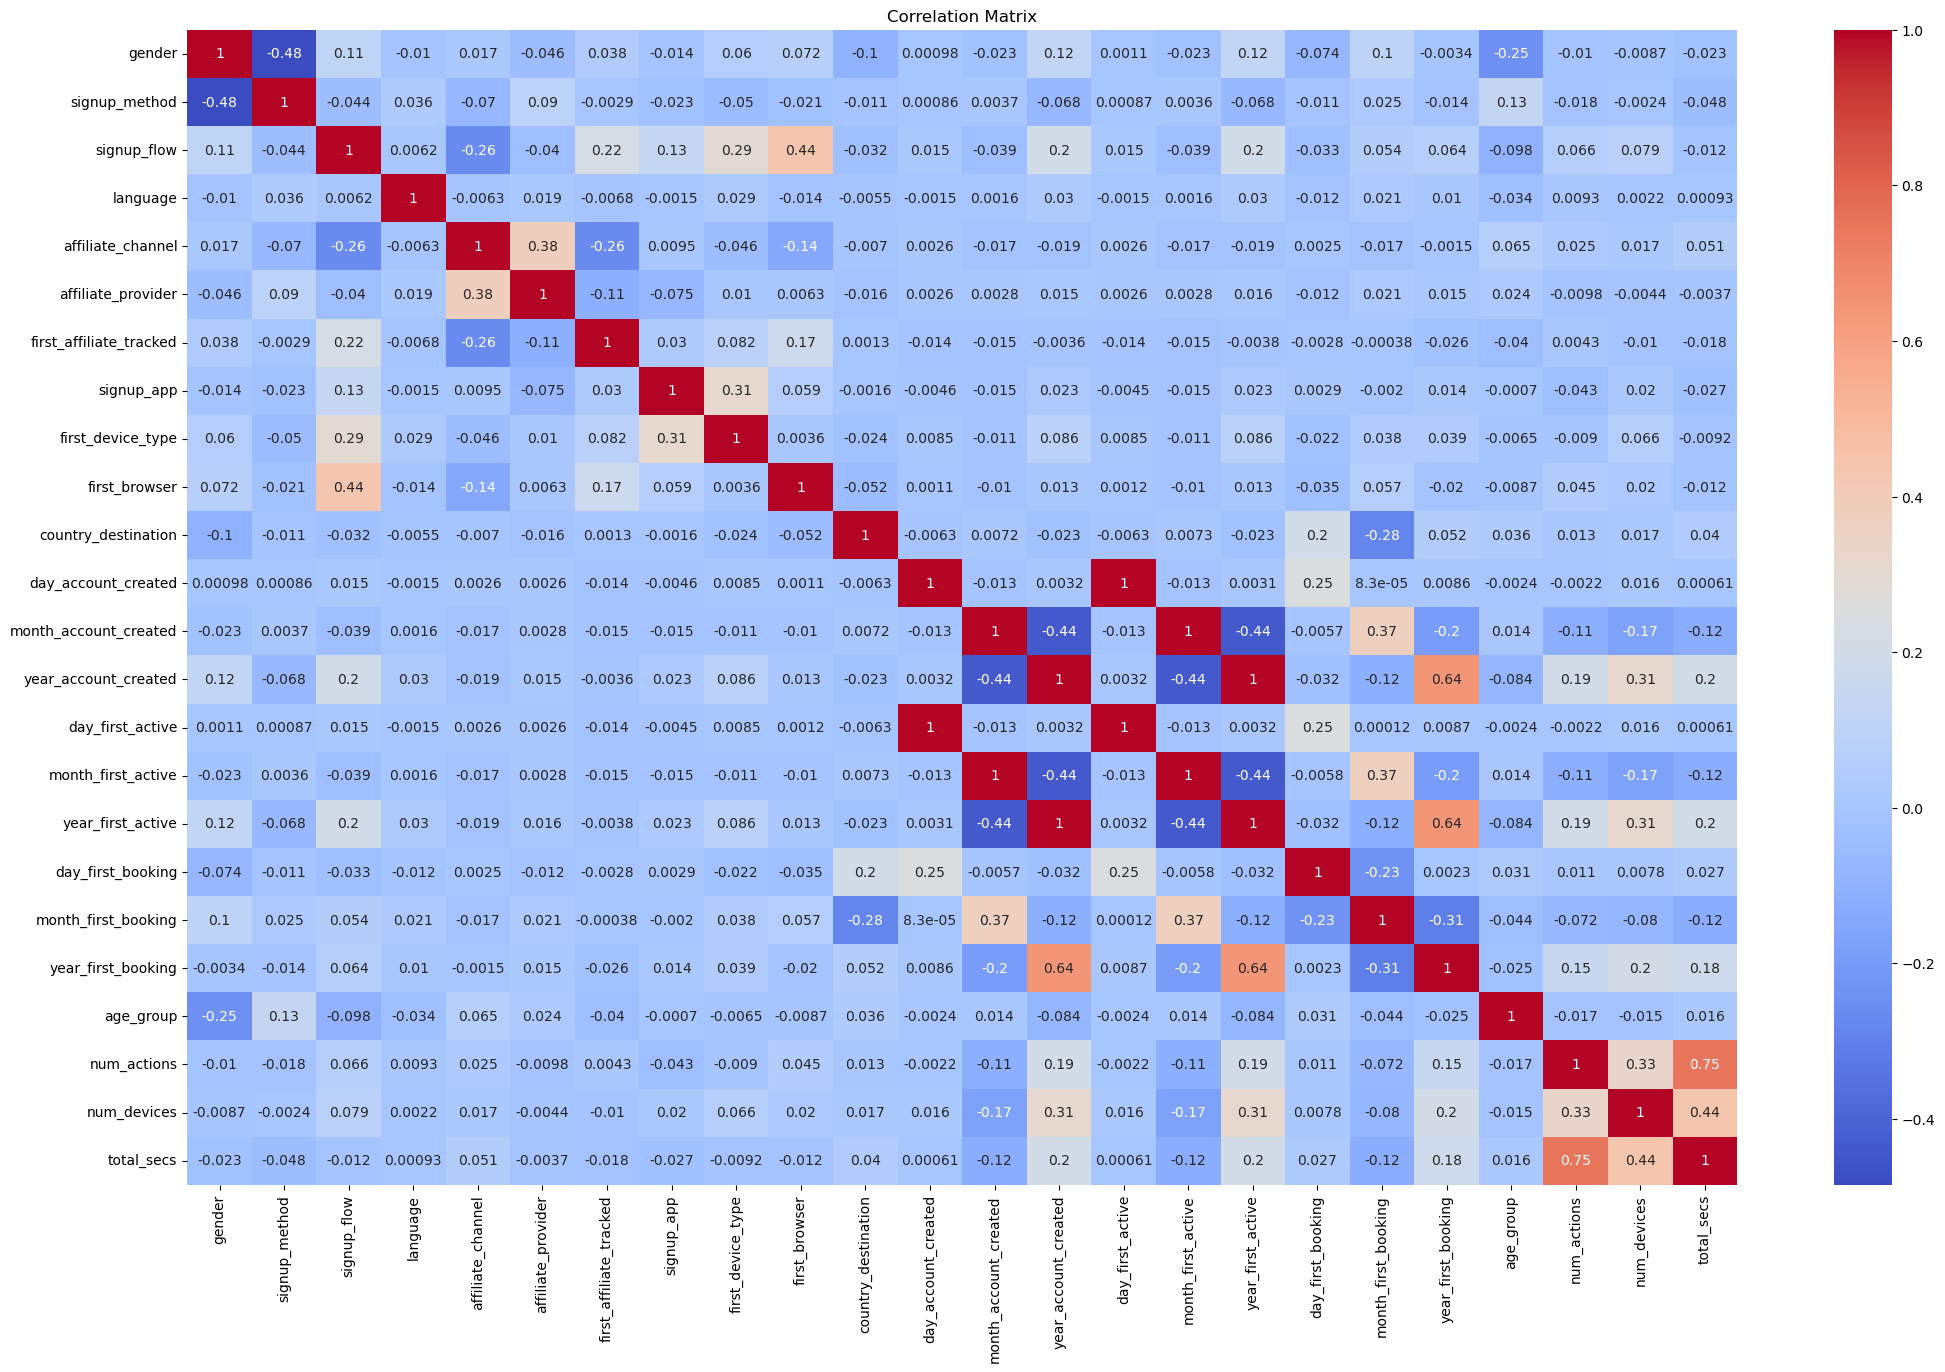

In [11]:
plt.figure(figsize=(25, 15))

corr_matrix = df_train.select_dtypes(include='number').corr()#correlation heatmap to show relatioships
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Selection with RandomForest

In [12]:
X = df_train.drop(columns=['country_destination'])  
y = df_train['country_destination']  

In [13]:
from sklearn.ensemble import RandomForestClassifier

model_selection = RandomForestClassifier(random_state=42)
model_selection.fit(X, y)

RandomForestClassifier(random_state=42)

In [14]:
features = X.columns

#importances from the model
importances = model_selection.feature_importances_

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
16,day_first_booking,0.311676
17,month_first_booking,0.268609
18,year_first_booking,0.097579
10,day_account_created,0.040074
13,day_first_active,0.039829
9,first_browser,0.023743
19,age_group,0.022843
0,gender,0.021673
14,month_first_active,0.021627
11,month_account_created,0.021124


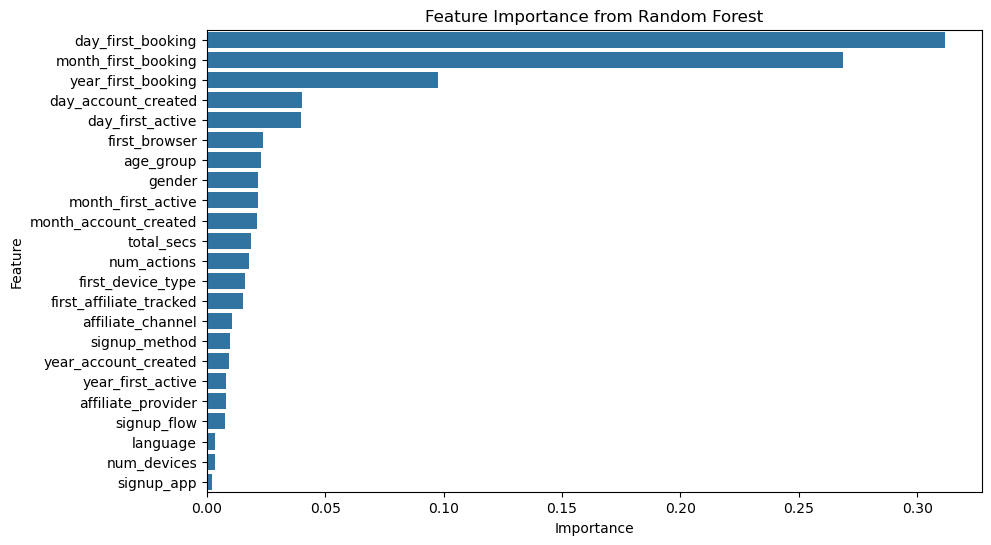

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [16]:
df_train.columns

Index(['gender', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'day_account_created', 'month_account_created',
       'year_account_created', 'day_first_active', 'month_first_active',
       'year_first_active', 'day_first_booking', 'month_first_booking',
       'year_first_booking', 'age_group', 'num_actions', 'num_devices',
       'total_secs'],
      dtype='object')

# Train - Test -Split

In [17]:
X = df_train.drop(columns=['country_destination','signup_app','language','num_devices','signup_flow','affiliate_provider','day_first_active', 'month_first_active',
       'year_first_active'])  
y = df_train['country_destination']

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
df_test=df_test.drop(columns=['signup_app','language','num_devices','signup_flow','affiliate_provider','day_first_active', 'month_first_active','year_first_active'])
df_test = scaler.transform(df_test)#i use the same scaler on df_test

In [20]:
city_counts = df_train['country_destination'].value_counts()
print(city_counts)

country_destination
7     124543
10     62376
11     10094
4       5023
6       2835
5       2324
3       2249
1       1428
2       1061
8        762
0        539
9        217
Name: count, dtype: int64


# XGB 

In [21]:
import xgboost as xgb

model = xgb.XGBClassifier(random_state=42)
model.fit(X_train_split, y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

# Predicted Country Destinations with IDs

In [22]:
from sklearn.metrics import accuracy_score
import math

y_val_pred = model.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)
val_accuracy_percentage = math.ceil(val_accuracy * 100)
print(f"Validation Accuracy: {val_accuracy_percentage}%")

Validation Accuracy: 88%


In [23]:
# test_predictions = model.predict(df_test)
country_map = {
    0: 'NDF', 1: 'US', 2: 'other', 3: 'FR', 4: 'CA', 5: 'GB', 6: 'ES', 7: 'IT',
    8: 'PT', 9: 'NL', 10: 'DE', 11: 'AU'
}

In [24]:
probabilities = model.predict_proba(df_test)
probabilities

array([[3.4286670e-02, 1.6237877e-02, 5.6668208e-03, ..., 4.2633494e-04,
        6.0851222e-01, 8.5853785e-02],
       [5.4968479e-03, 3.6489308e-02, 4.7807079e-02, ..., 2.2514400e-03,
        5.2430040e-01, 8.0398418e-02],
       [2.8900593e-03, 4.2524107e-02, 1.8318508e-02, ..., 2.1790902e-03,
        6.1796999e-01, 9.7465515e-02],
       ...,
       [5.6908512e-03, 3.4708884e-02, 5.0816674e-02, ..., 3.8081906e-03,
        6.0031527e-01, 9.5301472e-02],
       [3.3315194e-03, 1.9190235e-02, 9.5080230e-03, ..., 9.3804271e-04,
        7.7158314e-01, 1.6349578e-02],
       [1.4020243e-03, 7.0327516e-03, 1.8950006e-03, ..., 1.2608627e-03,
        9.0473735e-01, 4.9268249e-02]], dtype=float32)

In [25]:
top_5_predictions = []
for i, user_probs in enumerate(probabilities):
    # Get the top 5 predictions based on the probabilities
    top_5_indices = np.argsort(user_probs)[::-1][:5]  # Sort the probabilities in descending order and get the top 5
    top_5_countries = [country_map[idx] for idx in top_5_indices]
    
    # Add the data to the list
    for country in top_5_countries:
        top_5_predictions.append({
            'id': ids[i],
            'Predicted_Country_Destination': country
        })

# Convert the list to a DataFrame
top_5_predictions_df = pd.DataFrame(top_5_predictions)

top_5_predictions_df


,id,Predicted_Country_Destination
0,5uwns89zht,DE
1,5uwns89zht,CA
2,5uwns89zht,AU
3,5uwns89zht,FR
4,5uwns89zht,ES
...,...,...
310475,9uqfg8txu3,DE
310476,9uqfg8txu3,AU
310477,9uqfg8txu3,CA
310478,9uqfg8txu3,ES


In [26]:
value_counts = top_5_predictions_df['Predicted_Country_Destination'].value_counts()

print("Predicted Country Destination Frequency:")
print(value_counts)

Predicted Country Destination Frequency:
Predicted_Country_Destination
DE       62095
AU       60867
CA       57357
ES       38987
FR       32100
GB       25596
US       15081
PT        7159
other     6051
NDF       3876
NL        1003
IT         308
Name: count, dtype: int64


In [27]:
# from sklearn.metrics import classification_report
# print(classification_report(y_val_split, y_val_pred))


# Evaluating Model Performance with NDCG 

NDCG measures how well a model ranks its predictions,
giving more importance to placing the correct answers higher in the list. It helps evaluate ranking models, like recommendation systems, where the order of predictions matters, not just whether they are correct or not. The higher the relevant items are ranked, 
the better the model's performance is considered.

In [28]:
# LabelBinarizer is appropriate for use with NDCG as it converts categorical target labels 
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
y_val_encoded = label_binarizer.fit_transform(y_val_split)  

In [29]:
from sklearn.metrics import ndcg_score

y_pred_prob = model.predict_proba(X_val_split)  # Predict on validation set
# Calculate the NDCG score
model_score = ndcg_score(
    y_true=y_val_encoded,  
    y_score=y_pred_prob, 
    k=5, 
)

model_score = math.ceil(model_score * 100)
print(f"Model NDCG Score: {model_score}")

Model NDCG Score: 93


# Grid Search to optimize hyperparameters

In [30]:
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier


random_forest_model = RandomForestClassifier(class_weight='balanced',random_state=42)

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=12,random_state=42)

lgb_model = lgb.LGBMClassifier(is_unbalance=True, objective='multiclass', num_class=12,random_state=42)

# logistic_model = LogisticRegression(multi_class='multinomial', class_weight='balanced', solver='lbfgs', random_state=42)
hist_gb_model = HistGradientBoostingClassifier(loss='log_loss',class_weight='balanced',random_state=42)
catboost_model = CatBoostClassifier(loss_function='MultiClass', verbose=0,random_state=42)

In [31]:
# Grids for each model
#  [100, 150, 200, 300]   [ 10, 15, 20]
param_grid_rf = {'n_estimators': [ 200, 300], 'max_depth': [15, 20]}
param_grid_xgb = {'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
# [50, 100]
param_grid_lgb = {'n_estimators': [100], 'learning_rate': [0.01, 0.1]}
# param_grid_logistic = {'C': [0.1, 1, 10], 'penalty': ['l2']}
param_grid_catboost = {'depth': [3, 5], 'learning_rate': [0.01], 'iterations': [50]}
param_grid_hist_gb = {'max_iter': [200,300], 'learning_rate': [0.01, 0.001], 'max_depth': [ 7,10]}

# Dictionary of models
models = {
    'random_forest': (random_forest_model, param_grid_rf),
    'xgb': (xgb_model, param_grid_xgb),
    'lightgbm': (lgb_model, param_grid_lgb),
    # 'logistic_regression': (logistic_model, param_grid_logistic),
    'catboost': (catboost_model, param_grid_catboost),
    'hist_gradient_boosting': (hist_gb_model, param_grid_hist_gb),
}

In [32]:
#  GridSearchCV for each model
best_models = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_split, y_train_split)
    best_models[model_name] = grid_search.best_estimator_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}\n")

Best parameters for random_forest: {'max_depth': 20, 'n_estimators': 300}
Best score for random_forest: 0.8697411571796674

Best parameters for xgb: {'learning_rate': 0.1, 'max_depth': 5}
Best score for xgb: 0.875228390723823

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 170760, number of used features: 15
[LightGBM] [Info] Start training from score -5.995925
[LightGBM] [Info] Start training from score -4.997892
[LightGBM] [Info] Start training from score -5.299255
[LightGBM] [Info] Start training from score -4.553584
[LightGBM] [Info] Start training from score -3.750720
[LightGBM] [Info] Start training from score -4.537584
[LightGBM] [Info] Start training from score -4.319159
[LightGBM] [Info] Start training from scor

========================================**Prediction**===============================================

# XGB algorithm 

In [33]:
best_xgb_model = best_models['xgb']
best_xgb_model.fit(X_train_split, y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=12,
              num_parallel_tree=None, ...)

In [34]:
y_val_pred_1 = best_xgb_model.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred_1)

In [35]:
# round the accuracy
val_accuracy_percentage = math.ceil(val_accuracy * 100)
print(f"Validation Accuracy: {val_accuracy_percentage}%")

Validation Accuracy: 88%


# Predicted Country Destinations with Tunning

In [36]:
probabilities = best_xgb_model.predict_proba(df_test)

top_5_predictions = []
for i, user_probs in enumerate(probabilities):
    
    top_5_indices = np.argsort(user_probs)[::-1][:5]   
    top_5_countries = [country_map[idx] for idx in top_5_indices]
    
    for country in top_5_countries:
        top_5_predictions.append({
            'id': ids[i],
            'Predicted_Country_Destination': country
        })

top_5_predictions_df = pd.DataFrame(top_5_predictions)

top_5_predictions_df


,id,Predicted_Country_Destination
0,5uwns89zht,DE
1,5uwns89zht,CA
2,5uwns89zht,AU
3,5uwns89zht,FR
4,5uwns89zht,ES
...,...,...
310475,9uqfg8txu3,DE
310476,9uqfg8txu3,AU
310477,9uqfg8txu3,CA
310478,9uqfg8txu3,GB


In [37]:
# Count the frequency of each predicted value
value_counts = top_5_predictions_df['Predicted_Country_Destination'].value_counts()

print("Predicted Country Destination Frequency:")
print(value_counts)

Predicted Country Destination Frequency:
Predicted_Country_Destination
DE       62096
CA       61757
AU       61295
ES       44795
FR       36737
GB       29845
US        8338
other     2139
PT        2026
NDF       1064
NL         233
IT         155
Name: count, dtype: int64


# NDCG score_Tunning

In [38]:

y_pred_prob = best_xgb_model.predict_proba(X_val_split)  # Predict on validation set
# Calculate the NDCG score
model_1_score = ndcg_score(
    y_true=y_val_encoded,  
    y_score=y_pred_prob, 
    k=5, 

)
import math

model_1_score = math.ceil(model_1_score * 100)
print(f"Model NDCG Score: {model_1_score}")

Model NDCG Score: 93


#  Prediction With SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(random_state=42)  
X_train_sm, y_train_sm = smote.fit_resample(X_train_split, y_train_split)

print("before SMOTE:", y_train_split.value_counts())
print("after SMOTE:", y_train_sm.value_counts())

before SMOTE: country_destination
7     99700
10    49851
11     8088
4      4013
6      2273
5      1827
3      1798
1      1153
2       853
8       607
0       425
9       172
Name: count, dtype: int64
after SMOTE: country_destination
10    99700
7     99700
11    99700
4     99700
3     99700
6     99700
2     99700
5     99700
8     99700
1     99700
9     99700
0     99700
Name: count, dtype: int64


In [40]:
best_xgb_model_smote = best_models['xgb']
best_xgb_model_smote.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=12,
              num_parallel_tree=None, ...)

In [41]:
y_val_pred_smote = best_xgb_model_smote.predict(X_val_split)
val_accuracy_smote = accuracy_score(y_val_split, y_val_pred_smote)

In [42]:
val_accuracy_percentage_smote = math.ceil(val_accuracy_smote * 100)
print(f"Validation Accuracy:{val_accuracy_percentage_smote}%")

Validation Accuracy:85%


In [43]:
test_predictions_smote = best_xgb_model_smote.predict(df_test)

In [44]:
probabilities = best_xgb_model_smote.predict_proba(df_test)

top_5_predictions = []

for i, user_probs in enumerate(probabilities):
    top_5_indices = np.argsort(user_probs)[::-1][:5] 
    top_5_countries = [country_map[idx] for idx in top_5_indices]
    
    for country in top_5_countries:
        top_5_predictions.append({
            'id': ids[i],
            'Predicted_Country_Destination': country
        })

top_5_predictions_df = pd.DataFrame(top_5_predictions)

top_5_predictions_df


,id,Predicted_Country_Destination
0,5uwns89zht,DE
1,5uwns89zht,FR
2,5uwns89zht,ES
3,5uwns89zht,GB
4,5uwns89zht,CA
...,...,...
310475,9uqfg8txu3,DE
310476,9uqfg8txu3,GB
310477,9uqfg8txu3,NDF
310478,9uqfg8txu3,US


In [45]:
# Count the frequency of each predicted value
value_counts = top_5_predictions_df['Predicted_Country_Destination'].value_counts()

print("Predicted Country Destination Frequency:")
print(value_counts)

Predicted Country Destination Frequency:
Predicted_Country_Destination
DE       61780
CA       44560
ES       31057
GB       30550
FR       28993
PT       23943
US       22952
AU       20306
NL       18472
NDF      17176
other    10615
IT          76
Name: count, dtype: int64


In [46]:
top_5_predictions_df.to_csv('predictions_df_smote.csv', index=False)

# NDCG score_Smote

In [47]:
y_pred_prob_smote = best_xgb_model_smote.predict_proba(X_val_split)  # Predict on validation set
# Calculate the NDCG score
model_2_score = ndcg_score(
    y_true=y_val_encoded,  
    y_score=y_pred_prob_smote, 
    k=5, 
)
model_2_score = math.ceil(model_2_score * 100)
print(f"Model NDCG Score: {model_2_score}")

Model NDCG Score: 91


# Voting Classifier with Multiple Models for Ensemble Learning

In [48]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[
    ('random_forest', best_models['random_forest']),
    ('xgb', best_models['xgb']),
    ('lightgbm', best_models['lightgbm']),
    ('catboost', best_models['catboost']),
#     ('hist_gradient_boosting', best_models['hist_gradient_boosting']),  
], voting='soft', n_jobs=-1)

In [49]:
voting_model.fit(X_train_split, y_train_split)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=20,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=N...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_class=12,
                                            num_parallel_tree=None, ...)),
                             ('lightgbm',
                              LGBMClassifier(is_unbalance=True,
                                             learning_rate=0.01, num_class=12,
                                             objective='multiclass',
                                             random_state=42)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x000002082B94B530>)],
                 n_jobs=-1, voting='soft')

In [50]:
y_val_pred_vote = voting_model.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred_vote)
val_accuracy_percentage = math.ceil(val_accuracy * 100)  # rounding up to the nearest integer
print(f"Validation Accuracy: {val_accuracy_percentage}%")

Validation Accuracy: 88%


In [51]:
probabilities = voting_model.predict_proba(df_test)
top_5_predictions = []
for i, user_probs in enumerate(probabilities):
    
    top_5_indices = np.argsort(user_probs)[::-1][:5]  
    top_5_countries = [country_map[idx] for idx in top_5_indices]
    
    for country in top_5_countries:
        top_5_predictions.append({
            'id': ids[i],
            'Predicted_Country_Destination': country
        })

top_5_predictions_df = pd.DataFrame(top_5_predictions)

top_5_predictions_df


,id,Predicted_Country_Destination
0,5uwns89zht,DE
1,5uwns89zht,IT
2,5uwns89zht,AU
3,5uwns89zht,CA
4,5uwns89zht,FR
...,...,...
310475,9uqfg8txu3,DE
310476,9uqfg8txu3,AU
310477,9uqfg8txu3,IT
310478,9uqfg8txu3,CA


In [52]:
# Count the frequency of each predicted value
value_counts = top_5_predictions_df['Predicted_Country_Destination'].value_counts()

print("Predicted Country Destination Frequency:")
print(value_counts)

Predicted Country Destination Frequency:
Predicted_Country_Destination
DE       62096
AU       62080
IT       61742
CA       61700
ES       32923
FR       14404
GB       11792
US        2331
PT         536
other      461
NDF        349
NL          66
Name: count, dtype: int64


# NDCG score_Voting

In [53]:
y_pred_prob = voting_model.predict_proba(X_val_split)  # Predict on validation set
# Calculate the NDCG score
model_3_score = ndcg_score(
    y_true=y_val_encoded,  
    y_score=y_pred_prob, 
    k=5, 
)
model_3_score = math.ceil(model_3_score * 100)
print(f"Model NDCG Score: {model_3_score}")

Model NDCG Score: 93


In [54]:
top_5_predictions_df.to_csv('predictions_df_voting.csv', index=False)

# Building a Neural Network Model with Keras

A **Neural Network (NN)** is a system that mimics the way the brain works, with layers of nodes (neurons) to process data.

- **Input Layer**: The number of features in the data (`input_dim`).
- **Hidden Layers**: Layers with  128, 64  and 32 neurons, using **ReLU activation**, and **Dropout** for regularization.
- **Output Layer**: The number of classes (`output_dim`) with **softmax activation** for classification.
- **Adam Optimizer**: Helps adjust weights during training.
- **EarlyStopping**: Stops training when the model stops improving.

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

input_dim = X_train_split.shape[1]  
output_dim = len(y_train_split.unique())  


model_network = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(output_dim, activation='softmax')
])


D:\Down_apps\AnaCodaa\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**We need to balance batch size and epochs for effective training**

In [57]:
history = model_network.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=10,
    batch_size=32,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/10
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8380 - loss: 0.6481 - val_accuracy: 0.8741 - val_loss: 0.4939
Epoch 2/10
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8750 - loss: 0.4930 - val_accuracy: 0.8746 - val_loss: 0.4917
Epoch 3/10
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8748 - loss: 0.4888 - val_accuracy: 0.8747 - val_loss: 0.4900
Epoch 4/10
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8747 - loss: 0.4882 - val_accuracy: 0.8748 - val_loss: 0.4888
Epoch 5/10
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8738 - loss: 0.4904 - val_accuracy: 0.8747 - val_loss: 0.4888
Epoch 6/10
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8753 - loss: 0.4858 - val_accuracy: 0.8747 - val_loss: 0.4889
Epoch 7/10
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8741 - loss: 0.4885 - val_accuracy: 0.8748 - val_loss: 0.4882
Epoch 8/10
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8754 - loss: 0

In [58]:
loss, accuracy = model_network.evaluate(X_val_split, y_val_split, verbose=1)
accuracy_ceiled = math.ceil(accuracy * 100)  
print(f"Accuracy : {accuracy_ceiled}%")

1335/1335 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8737 - loss: 0.4896
Accuracy : 88%


In [59]:
probabilities = model_network.predict(df_test)

top_5_predictions = []
for i, user_probs in enumerate(probabilities):
    top_5_indices = user_probs.argsort()[-5:][::-1] 
    top_5_countries = [country_map[idx] for idx in top_5_indices]
    
    for country in top_5_countries:
        top_5_predictions.append({
            'id': ids[i],
            'Predicted_Country_Destination': country
        })

top_5_predictions_df = pd.DataFrame(top_5_predictions)

top_5_predictions_df


1941/1941 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


,id,Predicted_Country_Destination
0,5uwns89zht,DE
1,5uwns89zht,AU
2,5uwns89zht,CA
3,5uwns89zht,ES
4,5uwns89zht,GB
...,...,...
310475,9uqfg8txu3,DE
310476,9uqfg8txu3,AU
310477,9uqfg8txu3,CA
310478,9uqfg8txu3,GB


In [60]:
# Count the frequency of each predicted value
value_counts = top_5_predictions_df['Predicted_Country_Destination'].value_counts()

print("Predicted Country Destination Frequency:")
print(value_counts)

Predicted Country Destination Frequency:
Predicted_Country_Destination
DE       62096
AU       62096
CA       62073
ES       49836
GB       40035
FR       18063
IT       15986
US         235
other       34
NDF         13
NL           7
PT           6
Name: count, dtype: int64


In [61]:
y_pred_prob = model_network.predict(X_val_split)

model_1_score = ndcg_score(
    y_true=y_val_encoded,  
    y_score=y_pred_prob, 
    k=5
)
model_1_score = math.ceil(model_1_score * 100)
print(f"Model NDCG Score: {model_1_score}")

1335/1335 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Model NDCG Score: 93


# tracking the curves of training accuracy and validation accuracy 

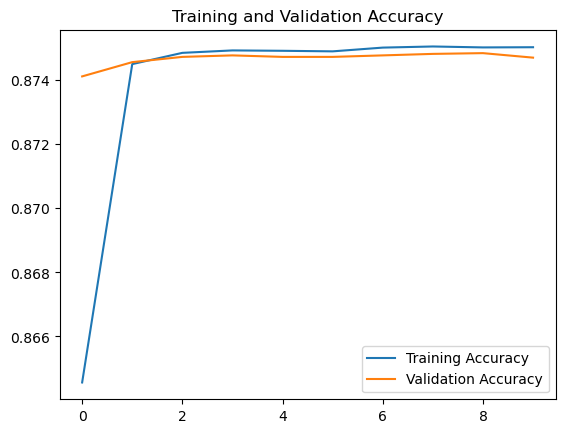

In [62]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

<!-- 
Training accuracy (blue): Increases quickly and stabilizes around 0.876.  
Validation accuracy (orange): Follows a similar trend but decreases slightly at the end, showing possible overfitting.  
 -->

# tracking the curves of training loss and validation loss

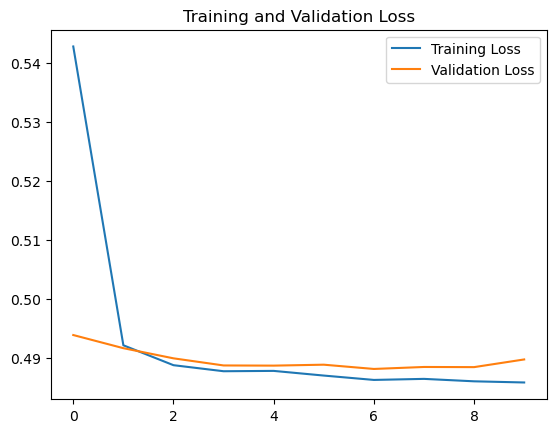

In [63]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

<!-- Training loss (blue): Decreases quickly and stabilizes at a low value.

Validation loss (orange): Decreases initially but rises slightly later, indicating possible overfitting. -->

# Flask Web Application for Predicting Country Destination


**Saving the voting_model Model using Joblib**

In [64]:
import joblib
joblib.dump(voting_model, 'voting_model.pkl')

['voting_model.pkl']

In [65]:
df_train.columns

Index(['gender', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'day_account_created', 'month_account_created',
       'year_account_created', 'day_first_active', 'month_first_active',
       'year_first_active', 'day_first_booking', 'month_first_booking',
       'year_first_booking', 'age_group', 'num_actions', 'num_devices',
       'total_secs'],
      dtype='object')

In [66]:
feature_names = [
    'gender', 'affiliate_channel',
     'first_affiliate_tracked', 'first_device_type','signup_method',
    'first_browser', 'day_account_created', 'month_account_created',
    'year_account_created', 'day_first_booking', 'month_first_booking',
    'year_first_booking', 'num_actions', 'total_secs',
    'age_group' 
]

encoding_maps = {
    'gender': {'FEMALE': 0, 'MALE': 1, 'OTHER': 3},
    'affiliate_channel': {
        'direct': 0, 'sem-brand': 1, 'sem-non-brand': 2, 'seo': 3, 
        'remarketing': 4, 'other': 5, 'content': 6
    },
    'first_affiliate_tracked': {
        'untracked': 0, 'omg': 1, 'linked': 2, 'tracked-other': 3, 
        'product': 4, 'marketing': 5, 'local ops': 6
    },
    'first_device_type': {'desktop': 0, 'mobile': 1, 'tablet': 2, 'other': 3},
    'first_browser': {'chrome': 0, 'firefox': 1, 'safari': 2, 'edge': 3, 'other': 4},
    'age_group': {  
        '18-25': 0, '26-35': 1, '36-45': 2, '46-55': 3, 
        '56-65': 4, '66-75': 5, '76-85': 6, '86-100': 7
    },
    'signup_method': {
        'facebook': 0,
        'basic': 1,
        'google': 2
    }
}



country_map = {
    0: 'NDF', 1: 'US', 2: 'other', 3: 'FR', 4: 'CA', 5: 'GB', 6: 'ES', 7: 'IT',
    8: 'PT', 9: 'NL', 10: 'DE', 11: 'AU'
}

# **Flask Web Application for Prediction with Feature Encoding and Model Integration**

In [67]:
from flask import Flask, request, render_template

# Function to preprocess the input data
def preprocess_input_data(input_data):
    features = []

    for feature in feature_names:
        if feature in encoding_maps:
            value = input_data.get(feature, 'unknown')  # Default value 'unknown'
            features.append(encoding_maps[feature].get(value, -1))  # -1 for missing values
        else:
            value = input_data.get(feature, 0)  # Default value 0
            features.append(float(value))
    
    return np.array(features).reshape(1, -1)

# Flask app
app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Receive the input data
        input_data = request.form.to_dict()
        
        # Preprocess the data
        features = preprocess_input_data(input_data)
        
        # Make prediction using the model 
        probabilities = voting_model.predict_proba(features)
        
        # Extract the top 5 countries with their probabilities
        top_5_indices = np.argsort(probabilities[0])[::-1][:5]  # Sort the probabilities in descending order and select top 5
        top_5_countries = [country_map.get(idx, 'Unknown') for idx in top_5_indices]
        
        return render_template(
            'index.html', 
            prediction_text=f'Top 5 Predicted Countries: {", ".join(top_5_countries)}'
        )
    except Exception as e:
        return render_template('index.html', prediction_text=f'Error: {str(e)}')

if __name__ == '__main__':
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [30/Dec/2024 09:08:51] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2024 09:08:52] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [30/Dec/2024 09:09:43] "POST /predict HTTP/1.1" 200 -


==================================================================================================================

**I’ve developed a Flask application to test my model locally, and it’s working successfully. The next step is to deploy it on a server to make it accessible to others**

In [68]:
X.columns

Index(['gender', 'signup_method', 'affiliate_channel',
       'first_affiliate_tracked', 'first_device_type', 'first_browser',
       'day_account_created', 'month_account_created', 'year_account_created',
       'day_first_booking', 'month_first_booking', 'year_first_booking',
       'age_group', 'num_actions', 'total_secs'],
      dtype='object')